In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
math_scores = pd.read_csv("C:/Users/Rosie/OneDrive/Desktop/student-math (1).csv")


In [ ]:
#The plan of attack is:
#Exploratory data analysis
#data cleaning and feature selection
#scaling and transformation
#fit and predict
#evaluate

In [3]:
#Basic exploratory data analysis

In [4]:
print(math_scores)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

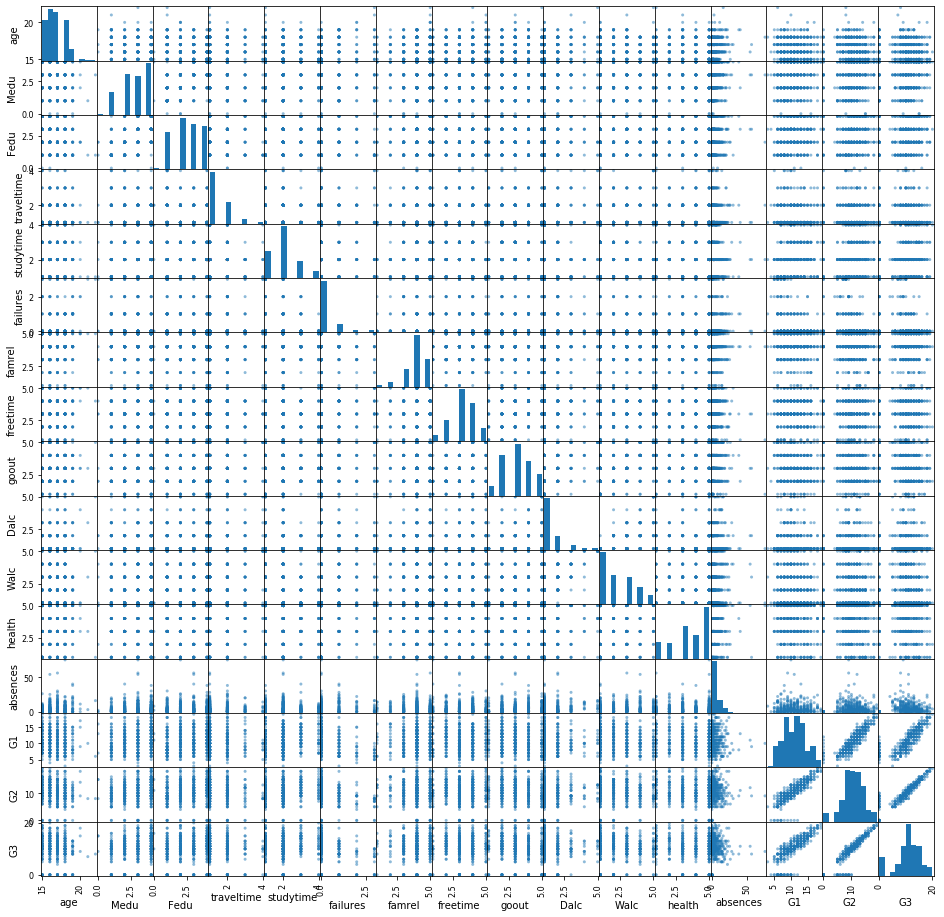

In [5]:
pd.plotting.scatter_matrix(math_scores, figsize = [16,16])
plt.show()

In [6]:
#G3 is the final year score, and the preferred label to predict to. 
#We see G1 is partially correlated with G3, and G2 is more strongly correlated with G3
#This makes sense. More work would be needed to make the other correlation scatter plots
#not have the granular, dotted look and so to be able to see trends there


In [7]:
print(math_scores.info)

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [8]:
print(math_scores.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [9]:
#Now, data cleaning. Checking for missing values, and outliers. 
#By comparing the max, 25/50/7y5% values, and mean, I see two features with possible outliers:
#absences and failures. Correcting this would take more follow up to examine the individual data points
#in their context and decide using domain knowledge if they are outlier. Visualization
#tools would also help greatly. 

In [10]:
#checking for missing values

In [11]:
print(math_scores.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [12]:
#No missing data, and all are in a usable dtype. If we needed to change the types, we 
#could use LabelEncoder in a loop


In [13]:
from sklearn.preprocessing import LabelEncoder

#instantiate the label encoder
le = LabelEncoder()

#iterate over all values in each column and extract their dtypes
for col in math_scores.columns.to_numpy():
    # check if dtype is an object
    if math_scores[col].dtypes =='object':
    # Use LabelEncoder to convert non-numeric values to numeric values
        math_scores[col]=le.fit_transform(math_scores[col])

In [14]:
#Now, we can perform feature select. I wonder if we could use a dimension reduction technique here
#like PCA? We can also use domain knowledge, in this case we know we want to drop G1 and G2 
#as being able to predict just on G3 would be more useful to our stakeholders.
#We would also want to consider dropping or consolidating other features (just consolidating right?)
#if they are highly correlated with other features, something we would have detected in the 
#exploratory data analysis phase. Note however, that (per Datacamp) Logistic Regression stills performs well with 
#correlated variables

In [15]:
math_scores = math_scores.drop(['G1', 'G2'], axis=1)

In [16]:
print(math_scores.head)

<bound method NDFrame.head of      school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    1   20        1        1        0     2     2     3     3  ...   
391       1    1   17        1        1        1     3     1     3     3  ...   
392       1    1   21        0        0        1     1     1     2     2  ...   
393       1    1   18        0        1        1     3     2     3     2  ...   
394       1    1   19        1        1        1     1     1     2     0  ...  

In [17]:
#Now, we can train, scale, fit and predict the log reg model

In [18]:
#In order to keep the test set unbiased, we must split into training and test set 
#before scaling (because scaling uses all the data given to it to scale, and so would be affected by the training set's presence)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#I'm not sure why we need to move the data from a pandas dataframe to numpy?

In [21]:
math_scores = math_scores.to_numpy()

In [22]:
#separate columns into features and target
X,y = math_scores[:,0:31], math_scores[:,30]

In [23]:
#split into train and test sets. A 33% split makes sense for this project, as we want to balance
#the risk of over and under-fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [24]:
#Rescaling. #Rescaling. Choosing MinMaxScaler because it's the only one I've worked with. Consider other scalers for better performance.
#I don't fully understand the reasons why I shouldn't also rescale the target variable. As directed by Datacamp tutorial, only rescaling the feature variables, 

In [25]:
#I also don't understand why we use fit_transform in one place, and transform in another place

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [27]:
#Now, fit the logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500)

In [29]:
#One thing I need to remember to keep straight, is there is features and target variables for both the training and test set

In [30]:
#Also, I don't understand why we wouldn't rescale the feature variables(i.e. y_train). 
#Is it because there is only one, and so we can't really rescale it? That makes sense, but
#still check to see if you have more than one feature variable if you would rescale it

In [31]:
logreg.fit(rescaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#Now, we can evaluate the model

from sklearn.metrics import confusion_matrix


In [34]:
#We need to generate new, predicted feature (i.e. y) values, from the test set. 

y_pred = logreg.predict(rescaled_X_test)

In [36]:
print("Accuracy of logistic regression classifier: ", logreg.score(rescaled_X_test, y_test))

Accuracy of logistic regression classifier:  0.183206106870229


In [37]:
#So, this is a very poor accuracy measure. We can try hyperparameter tuning to try and increase this

In [40]:
print("Accuracy of logistic regression classifier for training set: ", logreg.score(rescaled_X_train, y_train))

Accuracy of logistic regression classifier for training set:  0.5378787878787878


In [ ]:
#Hmmm, the algorithm isn't even that accurate on the training set, which should be much more accurate. 
#Follow ups should exlpore if a Log Reg is an appropriate model to use for this data

In [38]:
#print confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  6,  2,  0,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  5,  0,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  2,  0,  3,  0,  6,  2,  1,  0,  0,  3,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  3,  3,  3,  4,  1,  2,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  5,  0,  1,  0,  3,  1,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  1,  1,  0,  0,  1,  1,  0,  0,
         0,  0],
       [ 0,  0,  0,  

In [39]:
#Is this done correctly? This does not feel like a useful thing to examine. I need to learn more about 
#what a confusion matrix is

In [41]:
#Are false positives worse than false negatives here? Since this is a practice of an explatory scientific endeavour, I think both are equally bad
#but surely there is a more sophisticated way to think about this important question. 

In [50]:
#Attempting to improve model performance by hyperparameter tuning via grid search
from sklearn.model_selection import GridSearchCV
#Using the values of tolerance and max iterations from the tutorial. Learn more about what these do and how to choose the best ones

tol = [0.01, 0.001, 0.0001]
max_iter = [300, 750, 1200]
#I think making tol and max_iter their own eponymous variable is mostly for convienence

param_grid = dict(tol=tol, max_iter=max_iter)


In [45]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

In [46]:
#Note that the cv value can greatly impact the runtime of the program

In [47]:
#for some reason we need to rescale X again. Maybe because this is all X together, and not split into training or test sets? 

In [48]:
rescaled_X = scaler.fit_transform(X)

In [51]:
#fit grid model to the data

grid_model_result = grid_model.fit(rescaled_X, y)

C:\Users\Rosie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Rosie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Rosie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

In [52]:
#I don't understand these max_iter bugs. And can they impact the model accuracy?

In [54]:
#summarize the results
#I don't understand the % f and s syntax, but it seems like a neat trick. 
#Also, the .best_score_ and .best_params_ attributes are very useful
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))


Best: 0.210127 using {'max_iter': 100, 'tol': 0.01}


In [ ]:
#Ok, so 21% accuracy (accuracy is the true pos and the true negs over total) is pretty rough
#Follow up would be to explore far and wide for why this might be? Is Log Reg not the best model to use? Try other models.
#Also, this is a highly used dataset, see if you can see the accuracy values others have gotten
#Is the drop from 53% accurate in the training set to 21% accurate in the test set a sign of overfitting?
#I feel working to improve the model's performance is at the heart of machine learning and is well-worth doing


In [ ]:
#How do I see the precision, and other important scores?